In [ ]:
#load the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,5)
%matplotlib inline

import warnings # for warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/Cardiotocographic.csv') # loading dataset

In [ ]:
df.tail(100)

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
2026,129.0,0.000000,0.001010,0.006061,0.009091,0.0,0.001010,65.0,2.8,0.000000,0.263087,101.0,0.0,3.000000
2027,129.0,0.000000,0.000922,0.005530,0.008295,0.0,0.001843,65.0,2.8,0.000000,0.000000,101.0,0.0,3.000000
2028,129.0,0.000000,0.000847,0.005080,0.007621,0.0,0.001693,65.0,2.9,0.000000,0.000000,101.0,0.0,3.000000
2029,129.0,0.000000,0.000750,0.006747,0.006747,0.0,0.002249,65.0,3.1,0.000000,0.144354,180.0,-1.0,3.000000
2030,129.0,0.000000,0.000884,0.006189,0.006189,0.0,0.002653,66.0,2.9,0.000000,0.000000,94.0,0.0,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.0,0.000000,0.961268,0.007426,0.000000,0.0,0.000000,79.0,0.2,25.000000,7.200000,40.0,0.0,2.000000
2122,140.0,0.000775,0.000000,0.006979,0.000000,0.0,0.000000,78.0,0.4,22.000000,7.100000,66.0,1.0,2.000000
2123,140.0,0.000980,0.000000,0.006863,0.000000,0.0,0.000000,79.0,0.4,20.000000,6.100000,67.0,1.0,1.990464
2124,140.0,0.000679,0.000000,0.006110,0.000000,0.0,0.000000,78.0,0.4,27.000000,7.000000,66.0,1.0,2.000000


In [ ]:
# there are 2126 cols rows and 14 cols in dataset


In [ ]:
df.shape

(2126, 14)

In [ ]:
# In this dataset there are first 13 columns are x variables independent variables and last column is y variable dependent variable
# NSP is a categorical dependent variable
# it has 3 values
# N: Normal - 0
# S: Suspect - 1
# P: Pathologic - 2

In [ ]:
df.describe()
# performing descriptive statistics part by looking at this we might get idea about outliers

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
count,2105.000000,2106.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2126.000000,2126.000000,2126.000000,2105.000000,2105.000000,2105.000000,2105.000000
mean,133.343598,0.003219,0.009894,0.004391,0.001895,0.000003,0.000175,46.995984,1.364378,10.285964,8.284887,70.429260,0.316371,1.304507
std,11.270154,0.004391,0.067540,0.003340,0.003343,0.000142,0.000840,18.813973,1.173632,21.205041,7.772858,42.931822,0.645622,0.644619
min,51.842487,-0.019284,-0.480634,-0.014925,-0.015393,-0.001353,-0.005348,-63.000000,-6.600000,-91.000000,-50.700000,-174.000000,-3.000000,-1.025988
25%,126.000000,0.000000,0.000000,0.001851,0.000000,0.000000,0.000000,32.000000,0.700000,0.000000,4.600000,37.000000,0.000000,1.000000
50%,133.000000,0.001634,0.000000,0.004484,0.000000,0.000000,0.000000,49.000000,1.200000,0.000000,7.400000,67.000000,0.000000,1.000000
75%,140.000000,0.005650,0.002567,0.006536,0.003289,0.000000,0.000000,61.000000,1.700000,11.000000,10.900000,100.000000,1.000000,1.000000
max,214.000000,0.038567,0.961268,0.030002,0.030769,0.002706,0.010695,162.000000,13.800000,182.000000,101.400000,357.000000,3.000000,5.000000


In [ ]:
df.dtypes
# all are numerical columns


,0
LB,float64
AC,float64
FM,float64
UC,float64
DL,float64
DS,float64
DP,float64
ASTV,float64
MSTV,float64
ALTV,float64


check for duplicate records

In [ ]:
df.duplicated().sum()

2

In [ ]:
df[df.duplicated(keep=False)]

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
1113,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1115,122.0,0.000000,0.0,0.000000,0.0,0.0,0.0,19.0,1.9,0.0,15.1,39.0,0.0,1.0
1457,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0
1458,148.0,0.004717,0.0,0.002358,0.0,0.0,0.0,40.0,0.9,0.0,10.6,35.0,0.0,1.0


In [ ]:
df.drop_duplicates(inplace=True) # dropping duplicate records

In [ ]:
df.shape

(2124, 14)

missing values

In [ ]:
df.isna().sum()  # checking for missing values


,0
LB,21
AC,20
FM,0
UC,0
DL,0
DS,21
DP,21
ASTV,0
MSTV,0
ALTV,0


<Axes: >

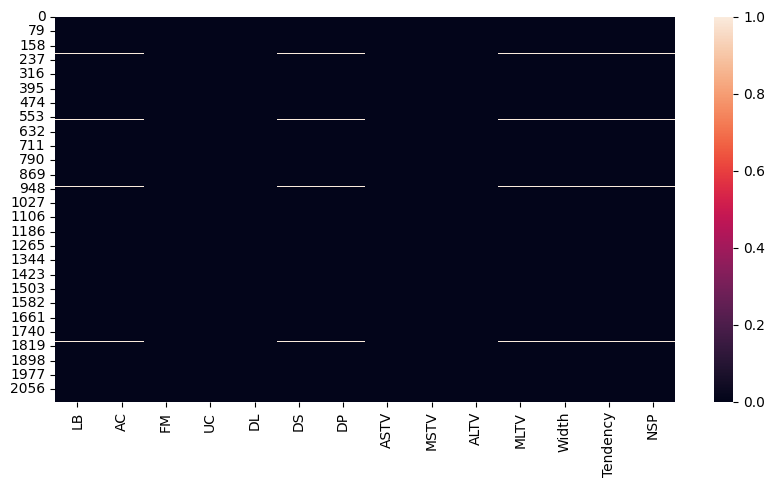

In [ ]:
sns.heatmap(df.isnull())  # visualization of missing values using heatmap

In [ ]:
for i in df.isna().sum():
  print((i/len(df))*100)
# it will give the percentage of missing values from each column

0.9887005649717515
0.9416195856873822
0.0
0.0
0.0
0.9887005649717515
0.9887005649717515
0.0
0.0
0.0
0.9887005649717515
0.9887005649717515
0.9887005649717515
0.9887005649717515


In [ ]:
# as there are 0 to 5 percent missing values in each colums we can drop them

In [ ]:
df.dropna(inplace=True)   # dropping null records
df.shape

(2103, 14)

In [ ]:
df.isna().sum() # u can see that there are no null records in the dataframe

,0
LB,0
AC,0
FM,0
UC,0
DL,0
DS,0
DP,0
ASTV,0
MSTV,0
ALTV,0


outliers treatment

<Axes: >

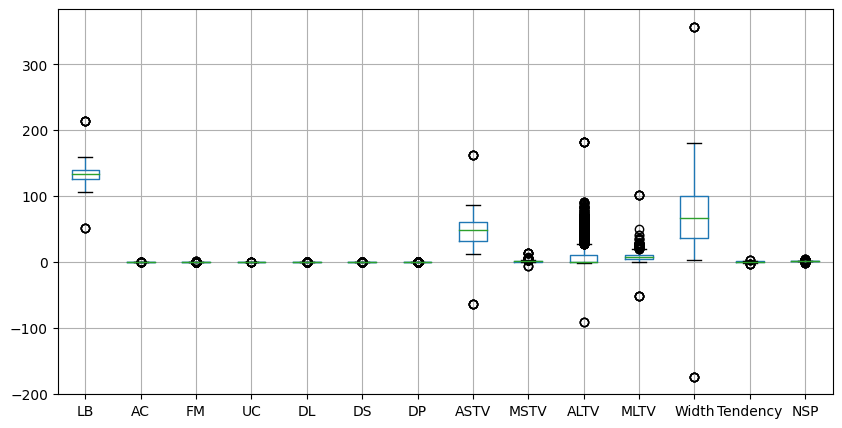

In [ ]:
# lets check for outliers
df.boxplot()

<Axes: xlabel='ALTV'>

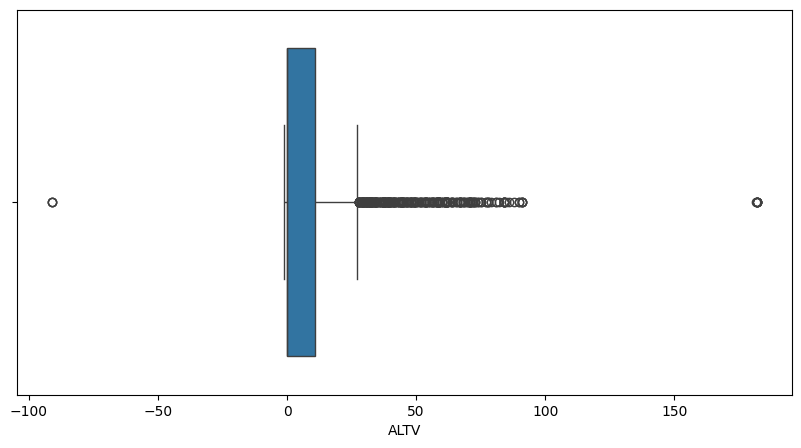

In [ ]:
sns.boxplot(x = df['ALTV'])

<Axes: xlabel='LB'>

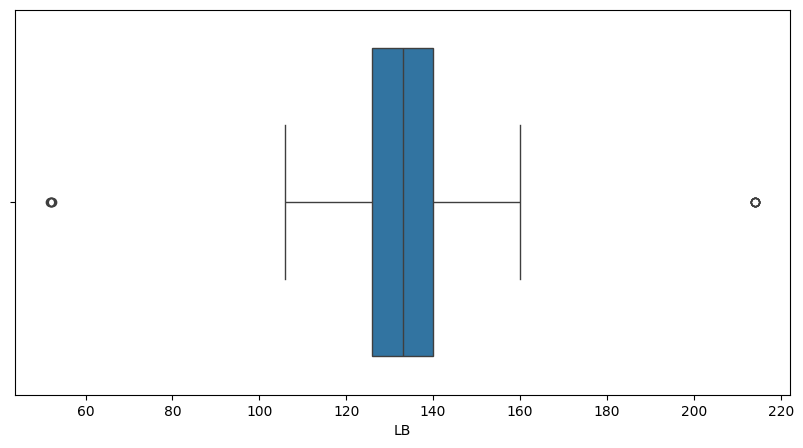

In [ ]:
sns.boxplot(x=df['LB'])

In [ ]:
# Outlier Detection: User defined Function to calculate Upper Extreme and Lower Extreme value
def outlier_detection(data,colname):
  q1 = data[colname].quantile(0.25)
  q3 = data[colname].quantile(0.75)
  iqr = q3 - q1

  upper_extreme = q3 + (1.5 * iqr)
  lower_extreme = q1 - (1.5 * iqr)

  return lower_extreme, upper_extreme,q1,q3

In [ ]:
outlier_detection(df,'LB')

(105.0, 161.0, 126.0, 140.0)

histogram


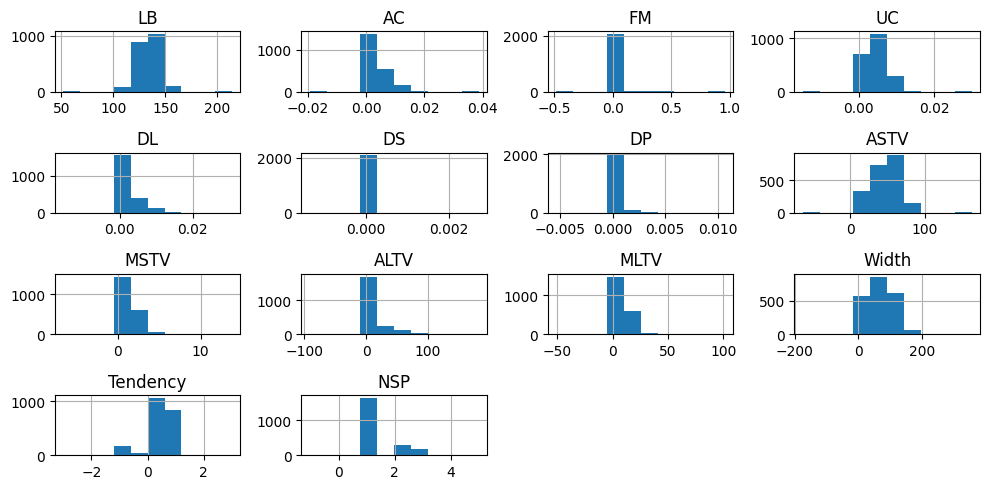

In [ ]:
df.hist()  #  Histogram for each column for outlier detection
plt.tight_layout()

pairplot

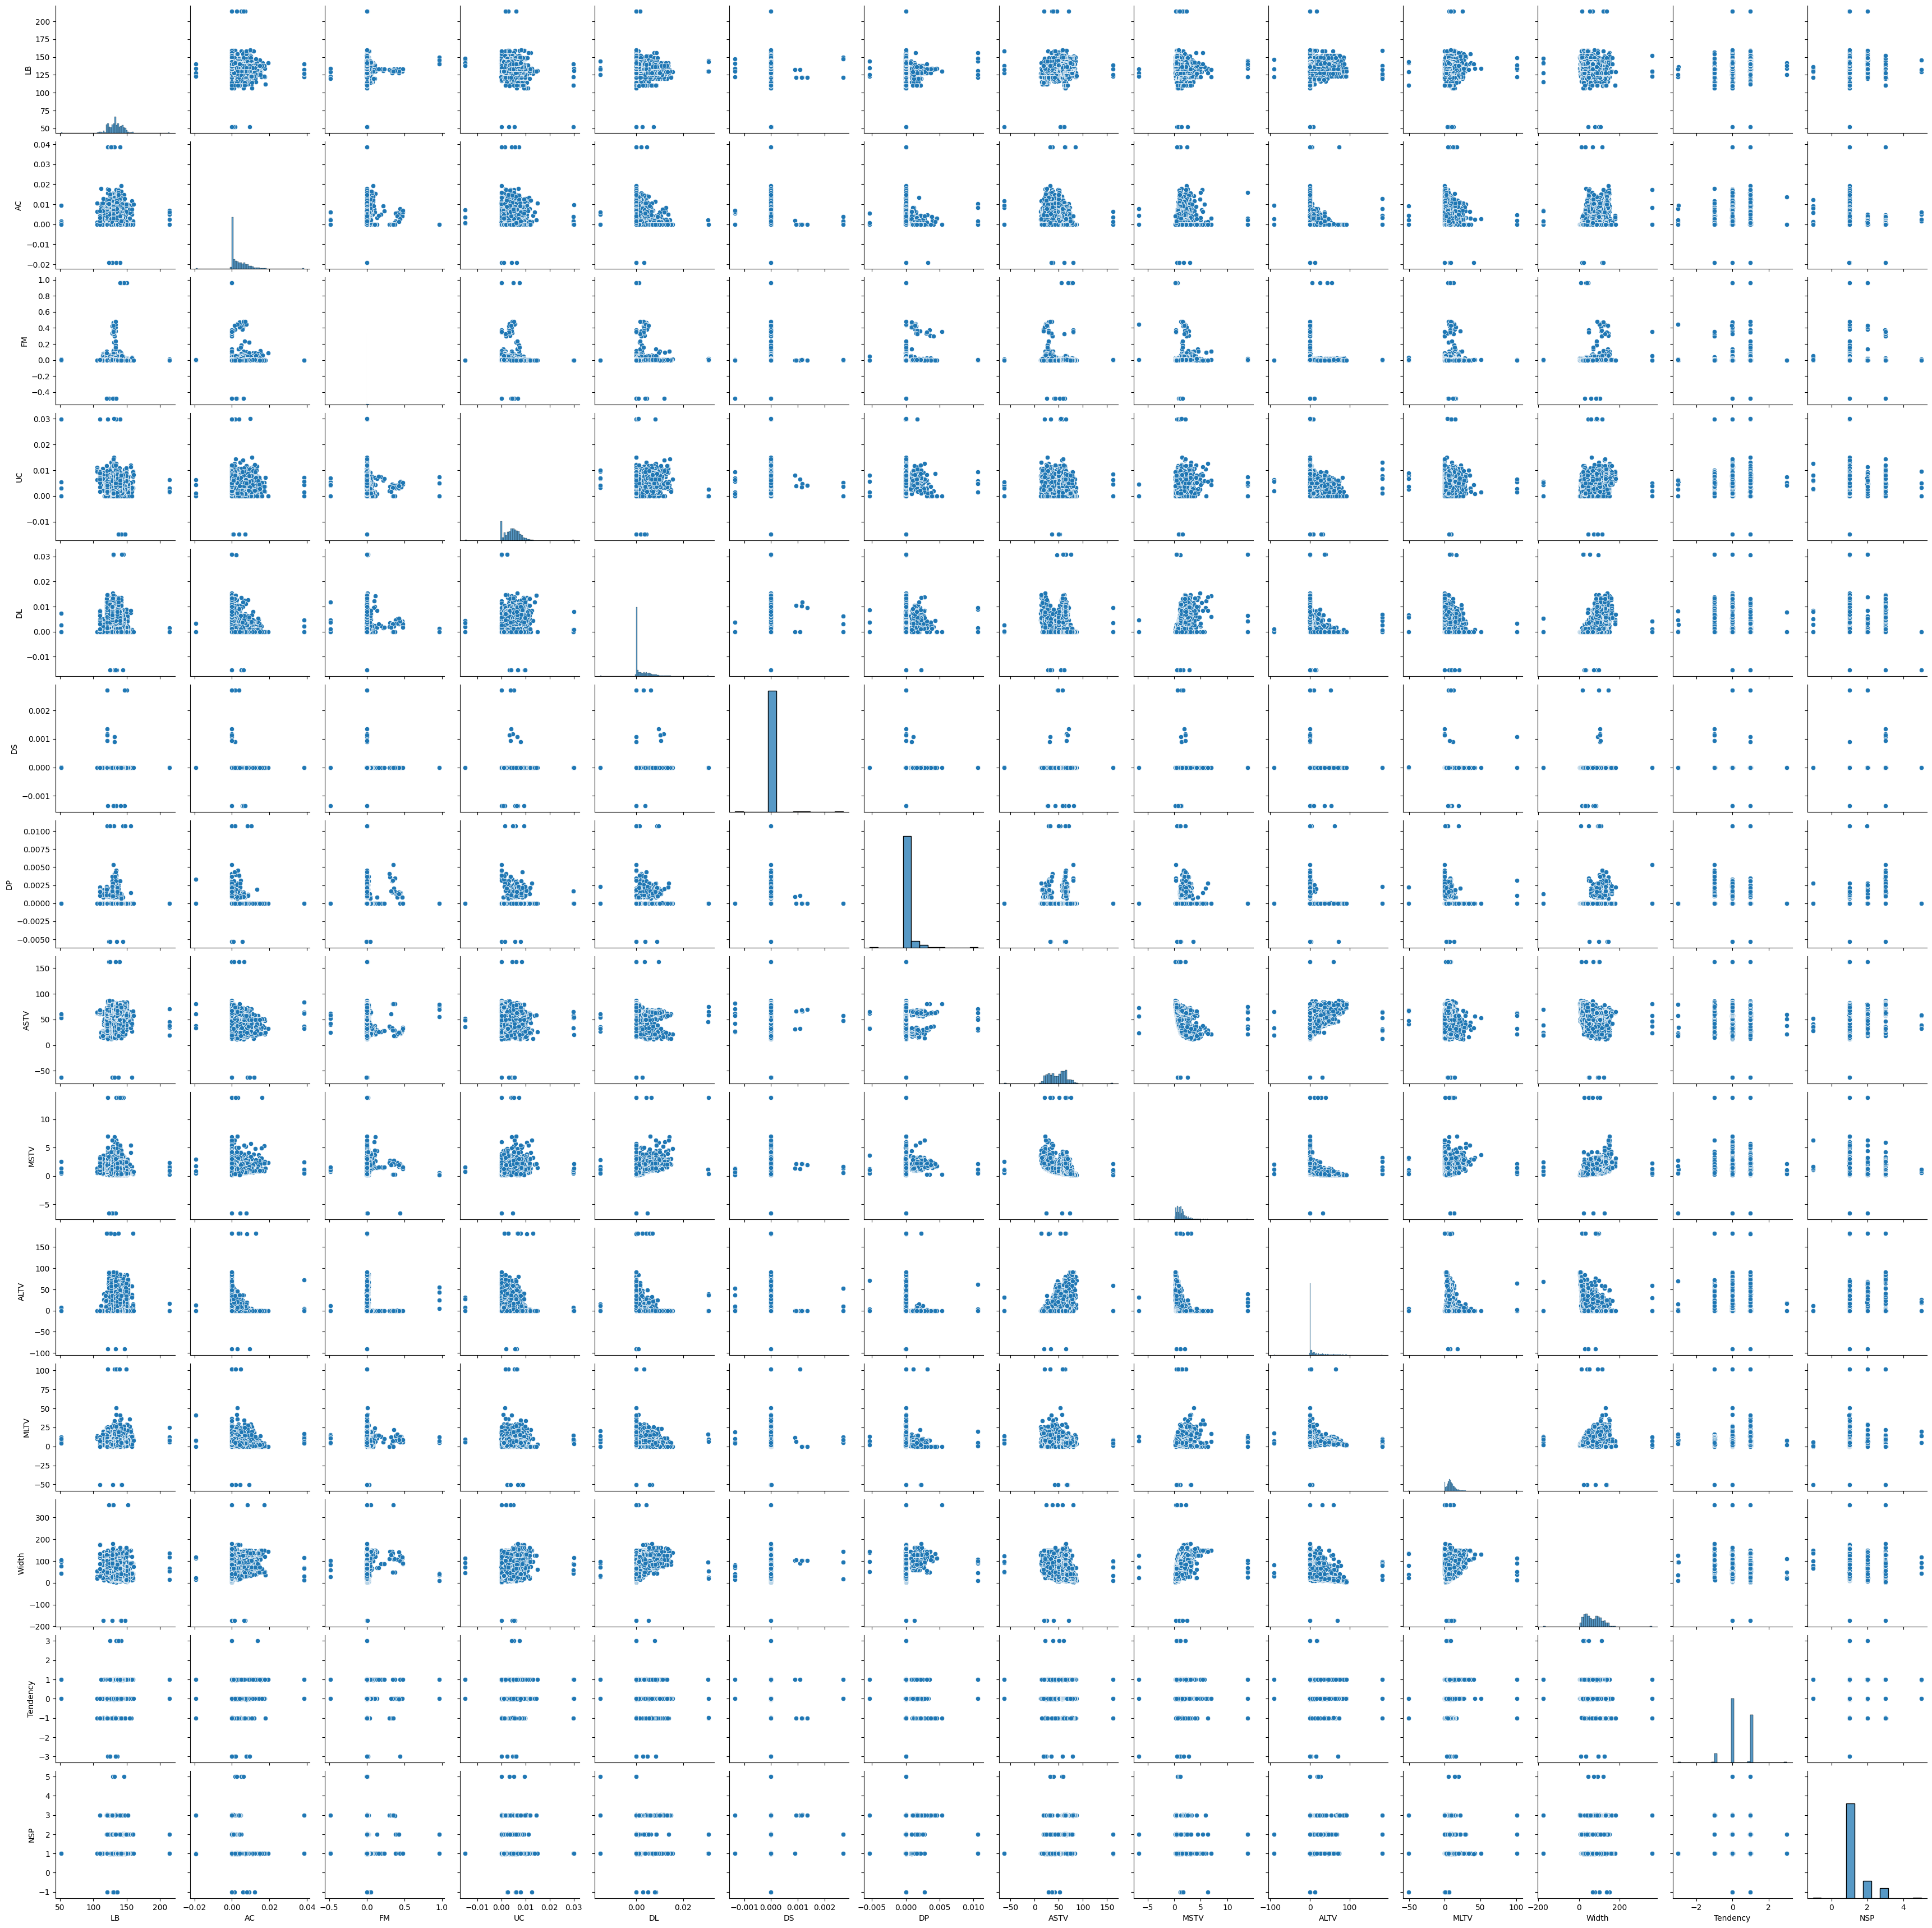

In [ ]:
sns.pairplot(df)


violine plot


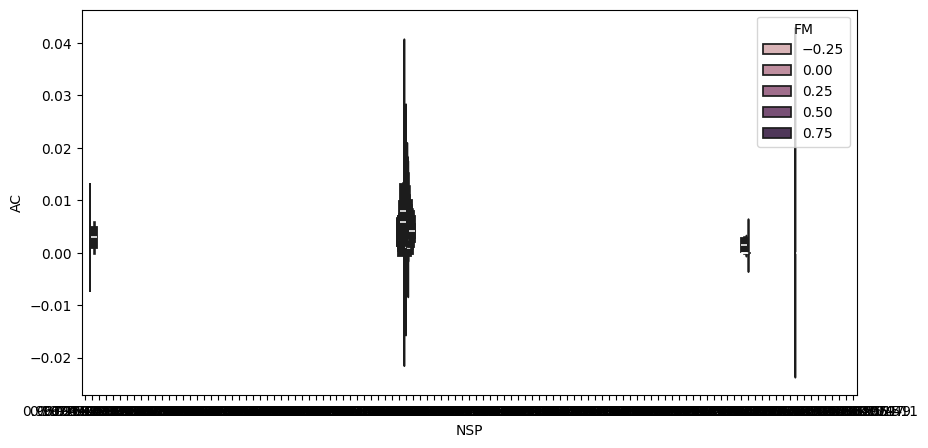

In [ ]:
sns.violinplot(x='NSP', y='AC',hue = 'FM', data=df, inner = "box", split='True')
plt.show()

Pattern Recognition and Insights:

In [ ]:
#Identifying Correlations

#To identify correlations between variables, you can use the .corr() method


In [ ]:
correlation_matrix = df.corr()

In [ ]:
correlation_matrix

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
LB,1.000000,-0.064452,0.018810,-0.167012,-0.126981,-0.005439,-0.047726,0.242435,-0.170134,0.210955,-0.003225,-0.118375,0.237112,0.132008
AC,-0.064452,1.000000,0.010127,0.069820,-0.095626,-0.033632,-0.084644,-0.231114,0.127010,-0.274055,-0.106308,0.238422,0.032399,-0.317113
FM,0.018810,0.010127,1.000000,-0.053139,0.009753,0.029899,0.121259,-0.032931,0.017488,-0.012345,-0.006157,0.097133,-0.018410,0.073997
UC,-0.167012,0.069820,-0.053139,1.000000,0.191473,-0.006957,0.070504,-0.182358,0.190295,-0.228399,-0.048862,0.106787,-0.067098,-0.185953
DL,-0.126981,-0.095626,0.009753,0.191473,1.000000,0.058625,0.145338,-0.071342,0.410270,-0.186882,-0.165494,0.409793,-0.023838,0.025179
DS,-0.005439,-0.033632,0.029899,-0.006957,0.058625,1.000000,0.004282,0.008441,0.016165,-0.004406,0.034366,0.040831,-0.015408,0.065399
DP,-0.047726,-0.084644,0.121259,0.070504,0.145338,0.004282,1.000000,0.038076,0.119911,-0.077865,-0.113993,0.175240,-0.130510,0.294416
ASTV,0.242435,-0.231114,-0.032931,-0.182358,-0.071342,0.008441,0.038076,1.000000,-0.293322,0.357478,-0.219922,-0.208439,-0.011367,0.422515
MSTV,-0.170134,0.127010,0.017488,0.190295,0.410270,0.016165,0.119911,-0.293322,1.000000,-0.291405,0.028807,0.435563,-0.036849,-0.095143
ALTV,0.210955,-0.274055,-0.012345,-0.228399,-0.186882,-0.004406,-0.077865,0.357478,-0.291405,1.000000,-0.107475,-0.346960,0.036552,0.365708


In [ ]:
# look which cross section of two variables shows maximum values

In [ ]:
# for quick visualization use heatmap

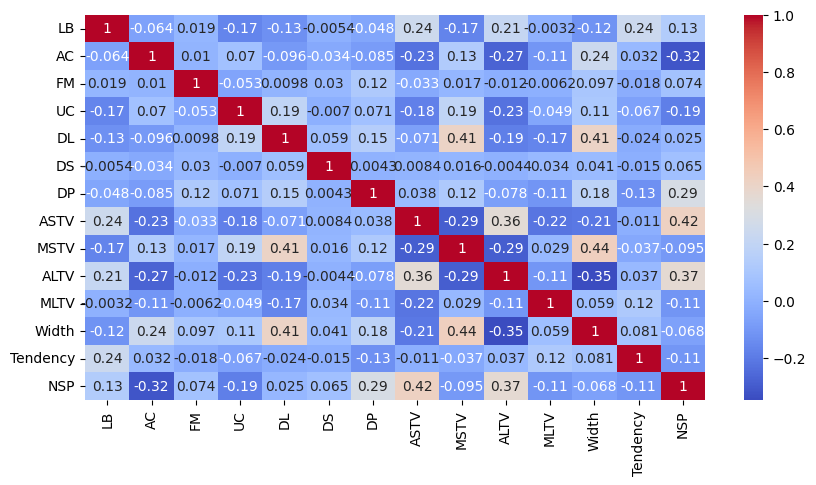

In [ ]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [ ]:
# like there are too many variables so im not explaining each and every
# but see for the values which shows strong correlation
# in this case Width and MSTV shows strong positive correlation
# also Width and ALTV shows strong negative correlation
# positive correlation means the two variables moves in the same direction,
## if the value of MSTV increases then it is also likely to increase in value of ,
## Width. or viceversa.
# negative correlation means the two variables moves in different direction,
## if the value of one variable increases then value of other decreases.

conclusion

In [ ]:
#The exploratory data analysis of the Cardiotocographic dataset revealed potential relationships between fetal heart rate,
##features and fetal state classification.
#
#Specifically, a strong positive correlation was observed between the duration of fetal heart,
##rate decelerations (Width) and short-term variability (MSTV), while a strong negative,
##correlation was found between Width and the percentage of time with abnormal long-term variability (ALTV).